Data Extraction and Preprocessing

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Filter the dataset for classes 1 and 7
X = X[(y == 1) | (y == 7)]
y = y[(y == 1) | (y == 7)]


 Exploratory Data Analysis (EDA)

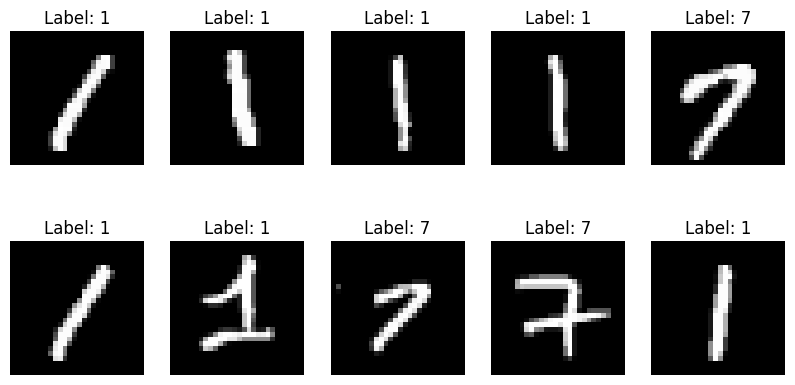

In [4]:
import matplotlib.pyplot as plt

# Visualize a few samples of class 1 and class 7
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y.iloc[i]}')
    plt.axis('off')
plt.show()

<ipython-input-5-81902a9f14c7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=class_counts, palette='viridis')


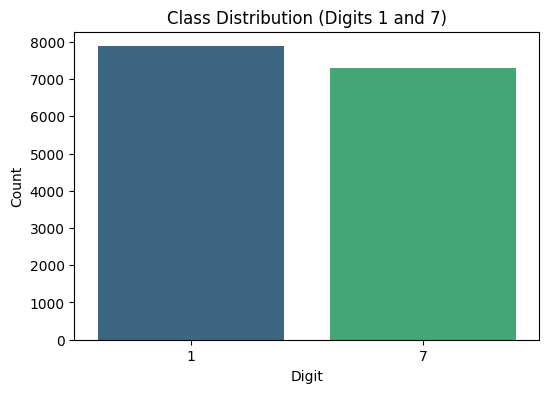

In [5]:
import numpy as np
import seaborn as sns

# Get the unique class counts
class_labels, class_counts = np.unique(y, return_counts=True)

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_labels, y=class_counts, palette='viridis')
plt.title("Class Distribution (Digits 1 and 7)")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

Data Normalization and Reshaping


In [6]:
X_normalized = X / 255.0

In [7]:
X_reshaped = X_normalized.values

Data Splitting

In [8]:
from sklearn.model_selection import train_test_split

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Further split the training data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Logistic Regression without regularization:

starting

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.29MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.49MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train dataset size: 10405
Validation dataset size: 2602
Test dataset size: 2163




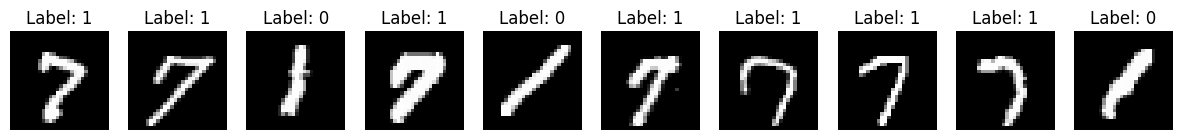

In [9]:
import torch
from torch.utils.data import DataLoader, random_split
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

# Define the transform for the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
mnist_full = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Mask to select only digits 1 and 7
train_mask = (mnist_full.targets == 1) | (mnist_full.targets == 7)
test_mask = (mnist_test.targets == 1) | (mnist_test.targets == 7)

# Apply the mask to filter out the data
mnist_full.data = mnist_full.data[train_mask]
mnist_full.targets = mnist_full.targets[train_mask]
mnist_test.data = mnist_test.data[test_mask]
mnist_test.targets = mnist_test.targets[test_mask]

# Map targets to 0 (for 6) and 1 (for 9)
mnist_full.targets = (mnist_full.targets == 7).float()
mnist_test.targets = (mnist_test.targets == 7).float()

# Split the training dataset into training and validation sets (80% train, 20% val)
train_size = int(0.8 * len(mnist_full))
val_size = len(mnist_full) - train_size
train_dataset, val_dataset = random_split(mnist_full, [train_size, val_size])

# Define the batch size
batch_size = 64

# Create DataLoader for train, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Verify Dataset Sizes
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(mnist_test)}\n\n")

# Example: Display some images from the dataset
def show_images(data_loader):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)

    fig, axes = plt.subplots(1, 10, figsize=(15, 3))
    for i in range(10):
        axes[i].imshow(images[i].squeeze(), cmap="gray")
        axes[i].set_title(f"Label: {labels[i].item()}")
        axes[i].axis("off")
    plt.show()

# Show a few images from the train loader
show_images(train_loader)


LR Without Regularization

1.   batch size =128
2.   no of epochs=8
3.   Optimizer= SGD
4.   Learning Rate=0.01





Epoch [1/8]
Train Loss: 1.9477, Train Accuracy: 81.04%
Validation Loss: 0.7132, Validation Accuracy: 87.55%

Epoch [2/8]
Train Loss: 0.7195, Train Accuracy: 90.70%
Validation Loss: 0.4769, Validation Accuracy: 92.58%

Epoch [3/8]
Train Loss: 0.5490, Train Accuracy: 92.91%
Validation Loss: 0.3561, Validation Accuracy: 94.50%

Epoch [4/8]
Train Loss: 0.4861, Train Accuracy: 94.02%
Validation Loss: 0.3087, Validation Accuracy: 95.35%

Epoch [5/8]
Train Loss: 0.4189, Train Accuracy: 94.86%
Validation Loss: 0.2764, Validation Accuracy: 95.70%

Epoch [6/8]
Train Loss: 0.3806, Train Accuracy: 95.43%
Validation Loss: 0.2206, Validation Accuracy: 96.27%

Epoch [7/8]
Train Loss: 0.3418, Train Accuracy: 95.82%
Validation Loss: 0.2027, Validation Accuracy: 96.62%

Epoch [8/8]
Train Loss: 0.3235, Train Accuracy: 96.10%
Validation Loss: 0.1884, Validation Accuracy: 96.66%


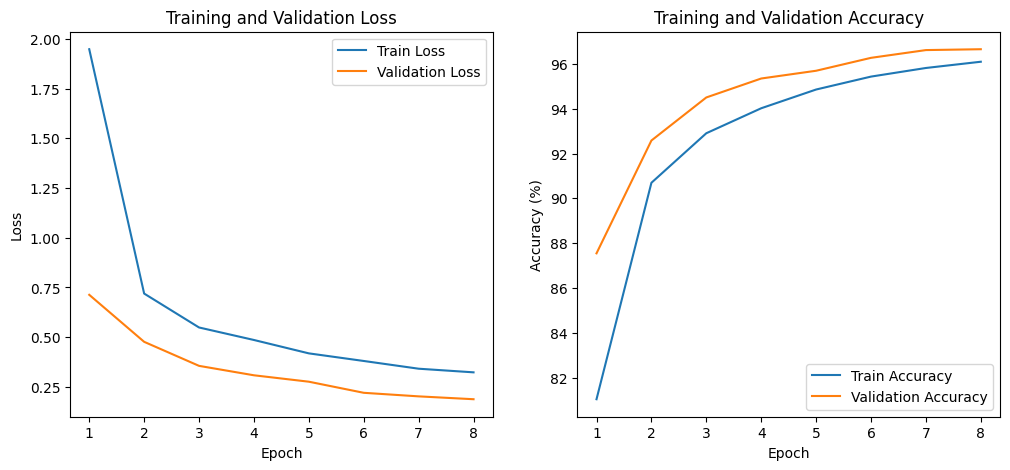

In [10]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(784, 1)
        nn.init.normal_(self.linear.weight, mean=0.0, std=1.0)
        nn.init.zeros_(self.linear.bias)

    def forward(self, x):
        x = self.flatten(x)
        return torch.sigmoid(self.linear(x))

# Initialize the model, loss function, and optimizer
model_noreg = LogisticRegression()
criterion = nn.BCELoss()
optimizer_noreg = optim.SGD(model_noreg.parameters(), lr=0.01)  # Changed optimizer to SGD with lr=0.01

# Training configuration
batch_size = 128  # Changed batch size
num_epochs = 8    # Changed number of epochs
train_losses_noreg = []
val_losses_noreg = []
train_acc_noreg = []
val_acc_noreg = []

# Training and validation loop
for epoch in range(num_epochs):
    model_noreg.train()
    train_correct = 0
    train_total = 0
    train_loss = 0

    for data, target in train_loader:
        data, target = data, target.float()
        optimizer_noreg.zero_grad()
        output = model_noreg(data)
        loss = criterion(output.squeeze(), target)
        loss.backward()
        optimizer_noreg.step()

        predicted = (output.squeeze() > 0.5).float()
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()
        train_loss += loss.item()

    # Validation
    model_noreg.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0

    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(), target.to().float()
            output = model_noreg(data)
            loss = criterion(output.squeeze(), target)
            predicted = (output.squeeze() > 0.5).float()
            val_total += target.size(0)
            val_correct += (predicted == target).sum().item()
            val_loss += loss.item()

    # Store the metrics
    train_losses_noreg.append(train_loss/len(train_loader))
    val_losses_noreg.append(val_loss/len(val_loader))
    train_acc_noreg.append(100 * train_correct/train_total)
    val_acc_noreg.append(100 * val_correct/val_total)

    # Log loss and accuracy
    print(f"\nEpoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {100 * train_correct/train_total:.2f}%")
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {100 * val_correct/val_total:.2f}%")

# Visualizing the loss and accuracy curves
epochs = range(1, num_epochs + 1)

# Plotting Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_noreg, label='Train Loss')
plt.plot(epochs, val_losses_noreg, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_noreg, label='Train Accuracy')
plt.plot(epochs, val_acc_noreg, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


1.  batch size =64
2.  no of epochs=10
3.  Optimizer= SGD
4.  Learning Rate=0.001


Epoch [1/10]
Train Loss: 24.3710, Train Accuracy: 51.72%
Validation Loss: 23.7696, Validation Accuracy: 52.31%

Epoch [2/10]
Train Loss: 23.5688, Train Accuracy: 51.72%
Validation Loss: 22.8315, Validation Accuracy: 52.34%

Epoch [3/10]
Train Loss: 22.3003, Train Accuracy: 51.72%
Validation Loss: 21.3252, Validation Accuracy: 52.34%

Epoch [4/10]
Train Loss: 20.2721, Train Accuracy: 51.59%
Validation Loss: 18.6353, Validation Accuracy: 51.96%

Epoch [5/10]
Train Loss: 16.2570, Train Accuracy: 48.66%
Validation Loss: 12.9367, Validation Accuracy: 44.77%

Epoch [6/10]
Train Loss: 11.0368, Train Accuracy: 38.08%
Validation Loss: 11.0818, Validation Accuracy: 36.40%

Epoch [7/10]
Train Loss: 10.6649, Train Accuracy: 40.26%
Validation Loss: 9.6003, Validation Accuracy: 43.35%

Epoch [8/10]
Train Loss: 7.5798, Train Accuracy: 47.53%
Validation Loss: 5.2568, Validation Accuracy: 50.31%

Epoch [9/10]
Train Loss: 4.1687, Train Accuracy: 54.56%
Validation Loss: 3.1417, Validation Accuracy: 57.2

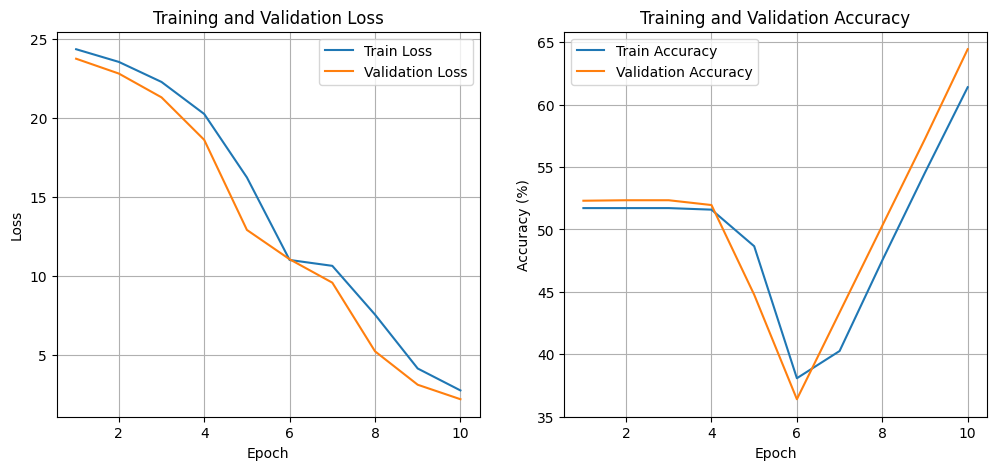

In [11]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(784, 1)
        nn.init.normal_(self.linear.weight, mean=0.0, std=1.0)
        nn.init.zeros_(self.linear.bias)

    def forward(self, x):
        x = self.flatten(x)
        return torch.sigmoid(self.linear(x))

# Initialize the model, loss function, and optimizer
model_noreg = LogisticRegression()
criterion = nn.BCELoss()
optimizer_noreg = optim.SGD(model_noreg.parameters(), lr=0.001)  # Changed optimizer to SGD with lr=0.01

# Training configuration
batch_size = 64  # Changed batch size
num_epochs = 10    # Changed number of epochs
train_losses_noreg = []
val_losses_noreg = []
train_acc_noreg = []
val_acc_noreg = []

# Training and validation loop
for epoch in range(num_epochs):
    model_noreg.train()
    train_correct = 0
    train_total = 0
    train_loss = 0

    for data, target in train_loader:
        data, target = data, target.float()
        optimizer_noreg.zero_grad()
        output = model_noreg(data)
        loss = criterion(output.squeeze(), target)
        loss.backward()
        optimizer_noreg.step()

        predicted = (output.squeeze() > 0.5).float()
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()
        train_loss += loss.item()

    # Validation
    model_noreg.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0

    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(), target.to().float()
            output = model_noreg(data)
            loss = criterion(output.squeeze(), target)
            predicted = (output.squeeze() > 0.5).float()
            val_total += target.size(0)
            val_correct += (predicted == target).sum().item()
            val_loss += loss.item()

    # Store the metrics
    train_losses_noreg.append(train_loss/len(train_loader))
    val_losses_noreg.append(val_loss/len(val_loader))
    train_acc_noreg.append(100 * train_correct/train_total)
    val_acc_noreg.append(100 * val_correct/val_total)

    # Log loss and accuracy
    print(f"\nEpoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {100 * train_correct/train_total:.2f}%")
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {100 * val_correct/val_total:.2f}%")

# Visualizing the loss and accuracy curves
epochs = range(1, num_epochs + 1)

# Plotting Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_noreg, label='Train Loss')
plt.plot(epochs, val_losses_noreg, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_noreg, label='Train Accuracy')
plt.plot(epochs, val_acc_noreg, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()

plt.show()


remeber to add per class accuracy


Epoch [1/10]
Train Loss: 2.0615, Train Accuracy: 67.29%
Validation Loss: 1.6998, Validation Accuracy: 70.25%

Epoch [2/10]
Train Loss: 1.6220, Train Accuracy: 72.14%
Validation Loss: 1.3454, Validation Accuracy: 74.48%

Epoch [3/10]
Train Loss: 1.3140, Train Accuracy: 76.11%
Validation Loss: 1.0999, Validation Accuracy: 78.17%

Epoch [4/10]
Train Loss: 1.1117, Train Accuracy: 79.29%
Validation Loss: 0.9294, Validation Accuracy: 80.86%

Epoch [5/10]
Train Loss: 0.9718, Train Accuracy: 81.77%
Validation Loss: 0.8051, Validation Accuracy: 83.09%

Epoch [6/10]
Train Loss: 0.8742, Train Accuracy: 83.94%
Validation Loss: 0.7461, Validation Accuracy: 84.97%

Epoch [7/10]
Train Loss: 0.7950, Train Accuracy: 85.40%
Validation Loss: 0.6751, Validation Accuracy: 86.32%

Epoch [8/10]
Train Loss: 0.7303, Train Accuracy: 86.74%
Validation Loss: 0.6193, Validation Accuracy: 87.24%

Epoch [9/10]
Train Loss: 0.6808, Train Accuracy: 87.75%
Validation Loss: 0.5740, Validation Accuracy: 88.16%

Epoch [10

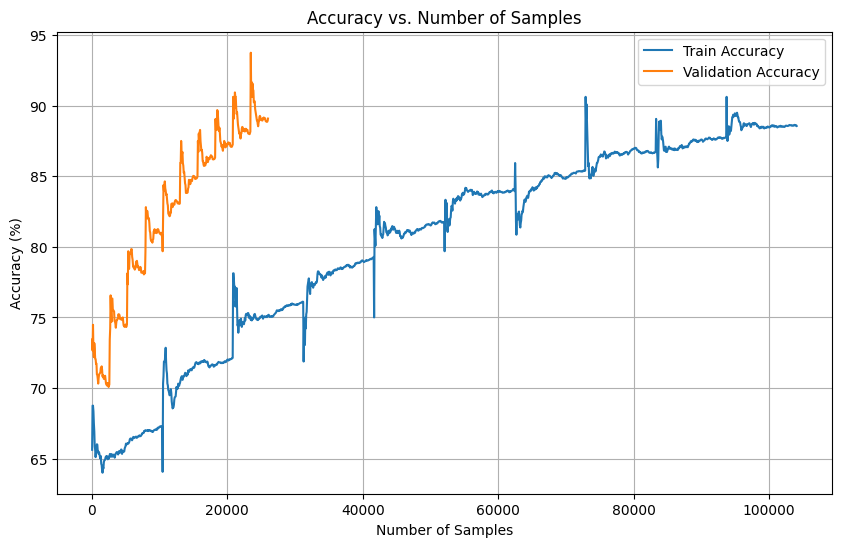

In [12]:
# Initialize variables to log number of samples and corresponding accuracy
train_samples = []
val_samples = []
cumulative_train_samples = 0
cumulative_val_samples = 0
train_acc_per_sample = []
val_acc_per_sample = []

batch_size = 64  # Changed batch size
num_epochs = 10    # Changed number of epochs
train_losses_noreg = []
val_losses_noreg = []
train_acc_noreg = []
val_acc_noreg = []

for epoch in range(num_epochs):
    model_noreg.train()
    train_correct = 0
    train_total = 0
    train_loss = 0

    for data, target in train_loader:
        data, target = data, target.float()
        optimizer_noreg.zero_grad()
        output = model_noreg(data)
        loss = criterion(output.squeeze(), target)
        loss.backward()
        optimizer_noreg.step()

        predicted = (output.squeeze() > 0.5).float()
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()
        train_loss += loss.item()

        # Log cumulative samples and accuracy
        cumulative_train_samples += target.size(0)
        train_samples.append(cumulative_train_samples)
        train_acc_per_sample.append(100 * train_correct / train_total)

    # Validation
    model_noreg.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0

    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(), target.to().float()
            output = model_noreg(data)
            loss = criterion(output.squeeze(), target)
            predicted = (output.squeeze() > 0.5).float()
            val_total += target.size(0)
            val_correct += (predicted == target).sum().item()
            val_loss += loss.item()

            # Log cumulative samples and accuracy
            cumulative_val_samples += target.size(0)
            val_samples.append(cumulative_val_samples)
            val_acc_per_sample.append(100 * val_correct / val_total)

    # Log progress
    print(f"\nEpoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {100 * train_correct/train_total:.2f}%")
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {100 * val_correct/val_total:.2f}%")

# Plot train and validation accuracy as a function of the number of samples
plt.figure(figsize=(10, 6))
plt.plot(train_samples, train_acc_per_sample, label='Train Accuracy')
plt.plot(val_samples, val_acc_per_sample, label='Validation Accuracy')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Samples')
plt.legend()
plt.grid()
plt.show()


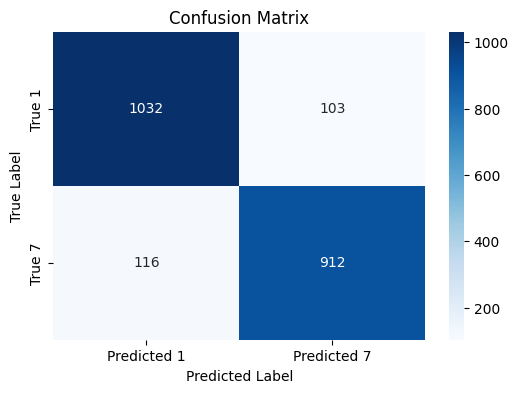

              precision    recall  f1-score   support

     Class 1       0.90      0.91      0.90      1135
     Class 7       0.90      0.89      0.89      1028

    accuracy                           0.90      2163
   macro avg       0.90      0.90      0.90      2163
weighted avg       0.90      0.90      0.90      2163



In [13]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Testing and Evaluation
y_pred_list = []
y_true_list = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(), target.to().float()
        output = model_noreg(data)
        predicted = (output.squeeze() > 0.5).float()

        y_pred_list.extend(predicted.cpu().numpy())
        y_true_list.extend(target.cpu().numpy())


# Confusion Matrix
conf_matrix = confusion_matrix(y_true_list, y_pred_list)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 1', 'Predicted 7'],
            yticklabels=['True 1', 'True 7'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report (includes per-class accuracy)
print(classification_report(y_true_list, y_pred_list, target_names=['Class 1', 'Class 7']))

LOGISTIC REGRESSION with REGULARIZATION

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

class RegularizedLogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten_layer = nn.Flatten()
        self.linear_layer = nn.Linear(784, 1)

    def forward(self, x):
        x = self.flatten_layer(x)
        return torch.sigmoid(self.linear_layer(x))

    def compute_l1_loss(self):
        return torch.sum(torch.abs(self.linear_layer.weight))

    def compute_l2_loss(self):
        return torch.sum(self.linear_layer.weight ** 2)

# Define the model
model = RegularizedLogisticRegression()

# Toggle between SGD and Adam by uncommenting the desired optimizer
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)  # Stochastic Gradient Descent
optimizer = optim.Adam(model.parameters(), lr=0.1)  # Adam Optimizer

# Set regularization weights and loss function
l1_penalty, l2_penalty = 0.001, 0.001
loss_function = nn.BCELoss()

# Arrays to store metrics
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

# Training and validation process
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    correct_predictions_train = 0
    total_samples_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs, labels.float()
        optimizer.zero_grad()
        predictions = model(inputs)
        main_loss = loss_function(predictions.squeeze(), labels)
        l1_loss = model.compute_l1_loss()
        l2_loss = model.compute_l2_loss()
        total_loss = main_loss + l1_penalty * l1_loss + l2_penalty * l2_loss
        total_loss.backward()
        optimizer.step()

        epoch_train_loss += total_loss.item()
        predicted_labels = (predictions.squeeze() > 0.5).float()
        correct_predictions_train += (predicted_labels == labels).sum().item()
        total_samples_train += labels.size(0)

    train_accuracy = 100 * correct_predictions_train / total_samples_train
    train_loss_history.append(epoch_train_loss / len(train_loader))
    train_accuracy_history.append(train_accuracy)

    # Validation
    model.eval()
    epoch_val_loss = 0
    correct_predictions_val = 0
    total_samples_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs, labels.float()
            predictions = model(inputs)
            loss = loss_function(predictions.squeeze(), labels)
            epoch_val_loss += loss.item()
            predicted_labels = (predictions.squeeze() > 0.5).float()
            correct_predictions_val += (predicted_labels == labels).sum().item()
            total_samples_val += labels.size(0)

    val_accuracy = 100 * correct_predictions_val / total_samples_val
    val_loss_history.append(epoch_val_loss / len(val_loader))
    val_accuracy_history.append(val_accuracy)

    # Print epoch metrics
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss_history[-1]:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {val_loss_history[-1]:.4f}, Validation Accuracy: {val_accuracy:.2f}%")



Epoch 1/10
Train Loss: 12.6437, Train Accuracy: 84.87%
Validation Loss: 0.0639, Validation Accuracy: 98.92%

Epoch 2/10
Train Loss: 0.7093, Train Accuracy: 97.15%
Validation Loss: 0.0473, Validation Accuracy: 99.35%

Epoch 3/10
Train Loss: 0.2836, Train Accuracy: 98.14%
Validation Loss: 1.4409, Validation Accuracy: 80.67%

Epoch 4/10
Train Loss: 0.5730, Train Accuracy: 97.69%
Validation Loss: 0.0314, Validation Accuracy: 99.27%

Epoch 5/10
Train Loss: 0.9663, Train Accuracy: 97.41%
Validation Loss: 0.1159, Validation Accuracy: 99.04%

Epoch 6/10
Train Loss: 0.6504, Train Accuracy: 97.59%
Validation Loss: 0.0375, Validation Accuracy: 99.19%

Epoch 7/10
Train Loss: 0.4385, Train Accuracy: 97.88%
Validation Loss: 0.0874, Validation Accuracy: 98.50%

Epoch 8/10
Train Loss: 0.5437, Train Accuracy: 97.44%
Validation Loss: 0.2141, Validation Accuracy: 99.08%

Epoch 9/10
Train Loss: 0.9229, Train Accuracy: 97.37%
Validation Loss: 0.2768, Validation Accuracy: 98.27%

Epoch 10/10
Train Loss: 0.

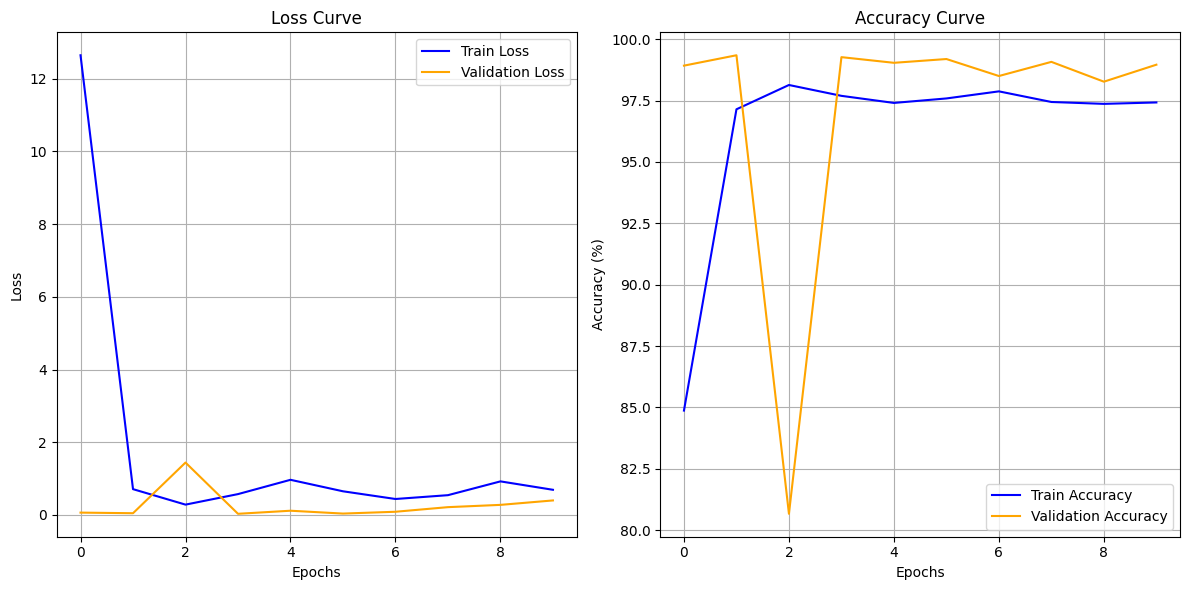

In [15]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(12, 6))

# Training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label="Train Loss", color='blue')
plt.plot(val_loss_history, label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid()

# Training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label="Train Accuracy", color='blue')
plt.plot(val_accuracy_history, label="Validation Accuracy", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Curve")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Epoch 1/10
Train Loss: 8.2261, Train Accuracy: 89.12%
Validation Loss: 0.0906, Validation Accuracy: 98.81%

Epoch 2/10
Train Loss: 0.3808, Train Accuracy: 97.52%
Validation Loss: 0.1970, Validation Accuracy: 98.69%

Epoch 3/10
Train Loss: 0.6492, Train Accuracy: 97.10%
Validation Loss: 0.5193, Validation Accuracy: 98.73%

Epoch 4/10
Train Loss: 0.6623, Train Accuracy: 98.15%
Validation Loss: 0.1087, Validation Accuracy: 99.00%

Epoch 5/10
Train Loss: 0.3742, Train Accuracy: 98.09%
Validation Loss: 0.0391, Validation Accuracy: 99.27%

Epoch 6/10
Train Loss: 0.3305, Train Accuracy: 97.84%
Validation Loss: 0.2147, Validation Accuracy: 95.62%

Epoch 7/10
Train Loss: 0.6067, Train Accuracy: 97.44%
Validation Loss: 0.0547, Validation Accuracy: 99.27%

Epoch 8/10
Train Loss: 0.2874, Train Accuracy: 98.23%
Validation Loss: 0.0596, Validation Accuracy: 99.27%

Epoch 9/10
Train Loss: 0.2319, Train Accuracy: 98.23%
Validation Loss: 0.0323, Validation Accuracy: 99.15%

Epoch 10/10
Train Loss: 0.6

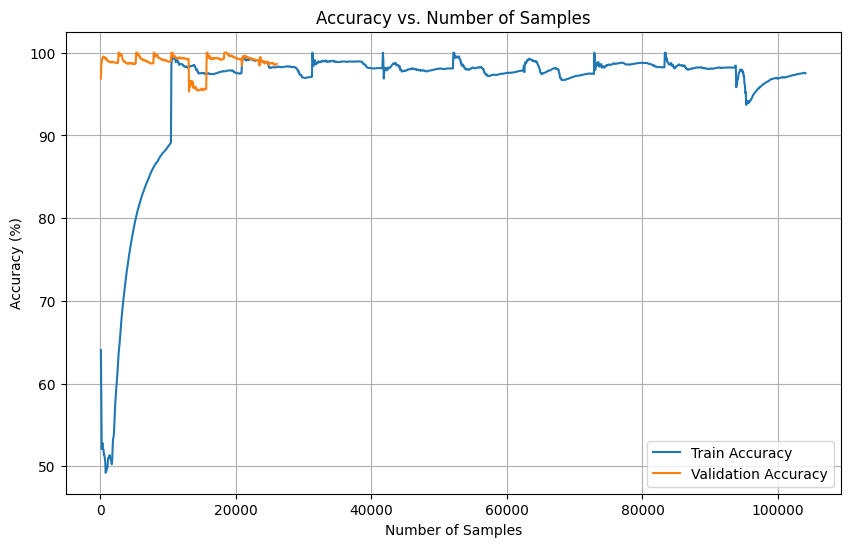

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

class RegularizedLogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten_layer = nn.Flatten()
        self.linear_layer = nn.Linear(784, 1)

    def forward(self, x):
        x = self.flatten_layer(x)
        return torch.sigmoid(self.linear_layer(x))

    def compute_l1_loss(self):
        return torch.sum(torch.abs(self.linear_layer.weight))

    def compute_l2_loss(self):
        return torch.sum(self.linear_layer.weight ** 2)

# Define the model
model = RegularizedLogisticRegression()

# Toggle between SGD and Adam by uncommenting the desired optimizer
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)  # Stochastic Gradient Descent
optimizer = optim.Adam(model.parameters(), lr=0.1)  # Adam Optimizer

# Set regularization weights and loss function
l1_penalty, l2_penalty = 0.001, 0.001
loss_function = nn.BCELoss()

# Initialize arrays for cumulative sample counts and accuracy
train_samples = []
val_samples = []
train_acc_per_sample = []
val_acc_per_sample = []
cumulative_train_samples = 0
cumulative_val_samples = 0

# Training and validation process with sample logging
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    correct_predictions_train = 0
    total_samples_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs, labels.float()
        optimizer.zero_grad()
        predictions = model(inputs)
        main_loss = loss_function(predictions.squeeze(), labels)
        l1_loss = model.compute_l1_loss()
        l2_loss = model.compute_l2_loss()
        total_loss = main_loss + l1_penalty * l1_loss + l2_penalty * l2_loss
        total_loss.backward()
        optimizer.step()

        epoch_train_loss += total_loss.item()
        predicted_labels = (predictions.squeeze() > 0.5).float()
        correct_predictions_train += (predicted_labels == labels).sum().item()
        total_samples_train += labels.size(0)

        # Log cumulative samples and accuracy
        cumulative_train_samples += labels.size(0)
        train_samples.append(cumulative_train_samples)
        train_acc_per_sample.append(100 * correct_predictions_train / total_samples_train)

    train_accuracy = 100 * correct_predictions_train / total_samples_train
    train_loss_history.append(epoch_train_loss / len(train_loader))
    train_accuracy_history.append(train_accuracy)

    # Validation
    model.eval()
    epoch_val_loss = 0
    correct_predictions_val = 0
    total_samples_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs, labels.float()
            predictions = model(inputs)
            loss = loss_function(predictions.squeeze(), labels)
            epoch_val_loss += loss.item()
            predicted_labels = (predictions.squeeze() > 0.5).float()
            correct_predictions_val += (predicted_labels == labels).sum().item()
            total_samples_val += labels.size(0)

            # Log cumulative samples and accuracy
            cumulative_val_samples += labels.size(0)
            val_samples.append(cumulative_val_samples)
            val_acc_per_sample.append(100 * correct_predictions_val / total_samples_val)

    val_accuracy = 100 * correct_predictions_val / total_samples_val
    val_loss_history.append(epoch_val_loss / len(val_loader))
    val_accuracy_history.append(val_accuracy)

    # Print epoch metrics
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss_history[-1]:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {val_loss_history[-1]:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Plot train/test accuracy as a function of the number of samples
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_samples, train_acc_per_sample, label='Train Accuracy')
plt.plot(val_samples, val_acc_per_sample, label='Validation Accuracy')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Samples')
plt.legend()
plt.grid()
plt.show()


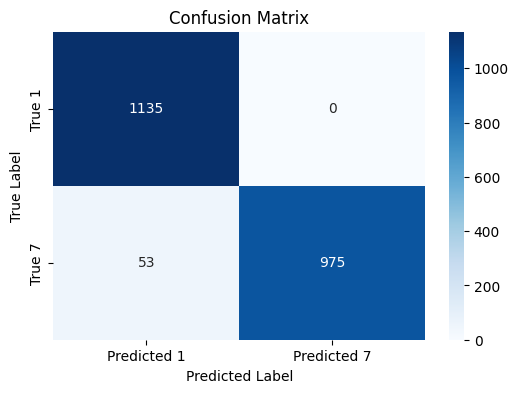

              precision    recall  f1-score   support

     Class 1       0.96      1.00      0.98      1135
     Class 7       1.00      0.95      0.97      1028

    accuracy                           0.98      2163
   macro avg       0.98      0.97      0.98      2163
weighted avg       0.98      0.98      0.98      2163



In [17]:

# Testing and Evaluation
y_pred_list = []
y_true_list = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(), target.to().float()
        output = model(data) # Use the 'model' for testing (regularized model)
        predicted = (output.squeeze() > 0.5).float()

        y_pred_list.extend(predicted.cpu().numpy())
        y_true_list.extend(target.cpu().numpy())


# Confusion Matrix
conf_matrix = confusion_matrix(y_true_list, y_pred_list)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 1', 'Predicted 7'],
            yticklabels=['True 1', 'True 7'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report (includes per-class accuracy)
print(classification_report(y_true_list, y_pred_list, target_names=['Class 1', 'Class 7']))

HYPERPARAMETER TUNING

In [18]:
import random
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold

# Define the RegularizedLogisticRegression class
class RegularizedLogisticRegression(nn.Module):
    def __init__(self):
        super(RegularizedLogisticRegression, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(784, 1)

    def forward(self, x):
        x = self.flatten(x)
        return torch.sigmoid(self.linear(x))

    def l1_loss(self):
        # L1 regularization (sum of absolute values of weights)
        return torch.sum(torch.abs(self.linear.weight))

    def l2_loss(self):
        # L2 regularization (sum of squared weights)
        return torch.sum(self.linear.weight ** 2)

# Parameters for random search
learning_rates = [0.1, 0.01, 0.001]
lambda_values = [0.1, 0.01, 0.001]
num_epochs = 25
best_accuracy = 0
best_params = {}
param_history = []

# Set up Cross-Validation (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Random search setup
for _ in range(10):  # Run 10 random configurations
    # Randomly select learning rate and lambda value
    lr = random.choice(learning_rates)
    lambda_val = random.choice(lambda_values)

    # Store the parameters for the current iteration
    param_history.append((lr, lambda_val))

    # Initialize model and optimizer
    model = RegularizedLogisticRegression()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Perform 5-fold cross-validation
    fold_accuracy = []

    for train_index, val_index in kf.split(train_loader.dataset):  # Cross-validation split
        # Prepare the data for the current fold
        train_data, val_data = Subset(train_loader.dataset, train_index), \
                               Subset(train_loader.dataset, val_index)
        train_loader_fold = DataLoader(train_data, batch_size=32, shuffle=True)
        val_loader_fold = DataLoader(val_data, batch_size=32, shuffle=False)

        # Train the model
        model.train()
        for epoch in range(num_epochs):
            for data, target in train_loader_fold:
                data, target = data.float(), target.float()
                optimizer.zero_grad()
                output = model(data)
                # Calculate the total loss with L1 and L2 regularization
                loss = criterion(output.squeeze(), target) + lambda_val * (model.l1_loss() + model.l2_loss())
                loss.backward()
                optimizer.step()

        # Validation step
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader_fold:
                data, target = data.float(), target.float()
                output = model(data)
                predicted = (output.squeeze() > 0.5).float()
                total += target.size(0)
                correct += (predicted == target).sum().item()

        # Calculate accuracy for the fold
        accuracy = correct / total
        fold_accuracy.append(accuracy)

    # Compute average accuracy across folds
    avg_accuracy = sum(fold_accuracy) / len(fold_accuracy)

    # Update the best parameters based on the highest average accuracy
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_params = {'LR': lr, 'lambda': lambda_val}

# Print the best parameters and accuracy
print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_accuracy:.4f}")


Best parameters found: {'LR': 0.001, 'lambda': 0.001}
Best cross-validation accuracy: 0.9932


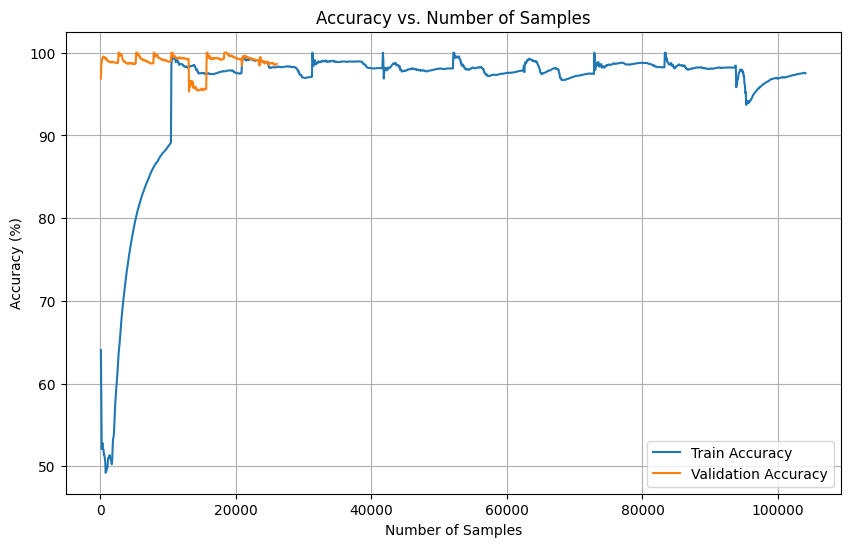

In [21]:
# prompt: # Plot train and validation accuracy as a function of the number of samples

# Plot train and validation accuracy as a function of the number of samples
plt.figure(figsize=(10, 6))
plt.plot(train_samples, train_acc_per_sample, label='Train Accuracy')
plt.plot(val_samples, val_acc_per_sample, label='Validation Accuracy')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Samples')
plt.legend()
plt.grid()
plt.show()

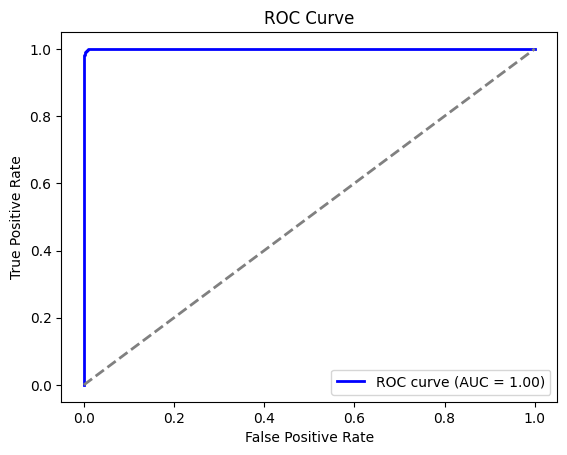

Per-Class Accuracy:
Class 0: 99.34%
Class 1: 99.60%


In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report

# Function to plot ROC and calculate AUC
def plot_roc_and_auc(model, data_loader):
    y_true = []
    y_scores = []

    model.eval()
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.float(), target.float()
            output = model(data)
            y_true.extend(target.numpy())
            y_scores.extend(output.squeeze().numpy())

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

# Calculate per-class accuracy
def per_class_accuracy(model, data_loader):
    model.eval()
    class_correct = [0] * 2  # Assuming binary classification (2 classes)
    class_total = [0] * 2

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.float(), target.float()
            output = model(data)
            predicted = (output.squeeze() > 0.5).long()
            for i in range(len(target)):
                label = int(target[i].item())
                class_correct[label] += (predicted[i].item() == label)
                class_total[label] += 1

    print("Per-Class Accuracy:")
    for i in range(2):
        print(f"Class {i}: {100 * class_correct[i] / class_total[i]:.2f}%")

# Run evaluation
test_auc = plot_roc_and_auc(model, val_loader)  # ROC and AUC
per_class_accuracy(model, val_loader)          # Per-class accuracy


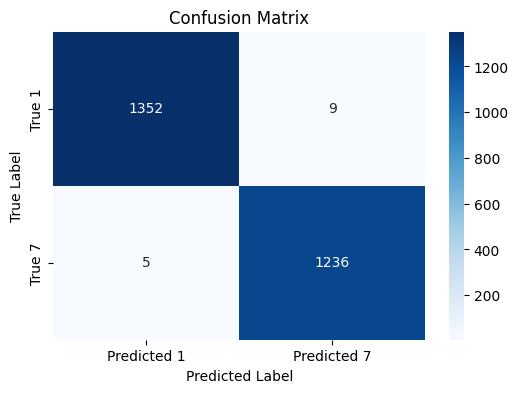

              precision    recall  f1-score   support

     Class 1       1.00      0.99      0.99      1361
     Class 7       0.99      1.00      0.99      1241

    accuracy                           0.99      2602
   macro avg       0.99      0.99      0.99      2602
weighted avg       0.99      0.99      0.99      2602



In [23]:

# Testing and Evaluation (if not already done)
y_pred_list = []
y_true_list = []

with torch.no_grad():
    for data, target in val_loader:  # Use val_loader for evaluation metrics
        data, target = data.to(), target.to().float()
        output = model(data)
        predicted = (output.squeeze() > 0.5).float()

        y_pred_list.extend(predicted.cpu().numpy())
        y_true_list.extend(target.cpu().numpy())

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_list, y_pred_list)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 1', 'Predicted 7'],
            yticklabels=['True 1', 'True 7'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report (includes per-class accuracy)
print(classification_report(y_true_list, y_pred_list, target_names=['Class 1', 'Class 7']))

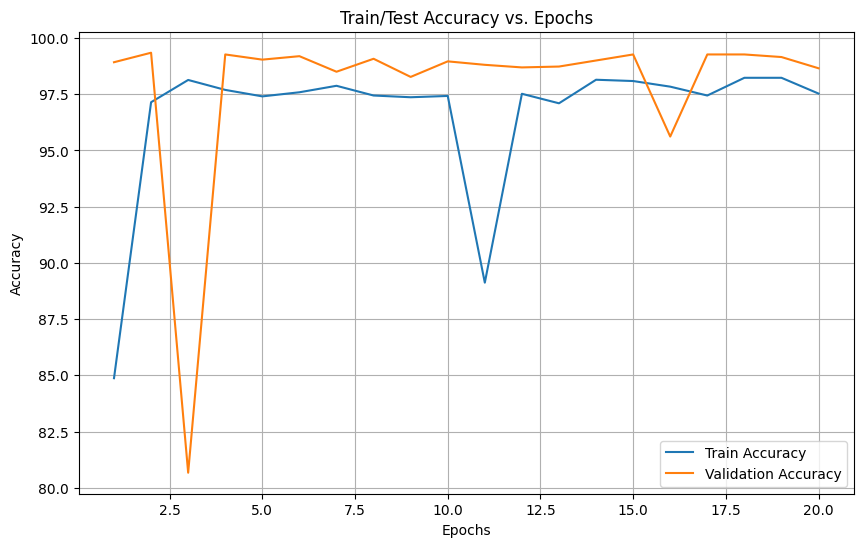

In [24]:

import matplotlib.pyplot as plt

epochs = range(1, len(train_accuracy_history) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy_history, label='Train Accuracy')
plt.plot(epochs, val_accuracy_history, label='Validation Accuracy')

# If you have C values available, uncomment the below and comment out the above
# plt.plot(C_values, train_accuracy_history, label='Train Accuracy')
# plt.plot(C_values, val_accuracy_history, label='Validation Accuracy')


plt.xlabel('Epochs') # or 'Hyperparameter C' if using C values
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy vs. Epochs') # Or 'Hyperparameter C' if using C values
plt.legend()
plt.grid(True)
plt.show()